In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import sklearn.cluster as cluster
import logging

In [2]:
logging.basicConfig(level = logging.INFO,
                    filename = "project3_logging.log",
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    datefmt = '%Y-%m-%d %H-%M-%S')

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
logging.info('Dataset loaded')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

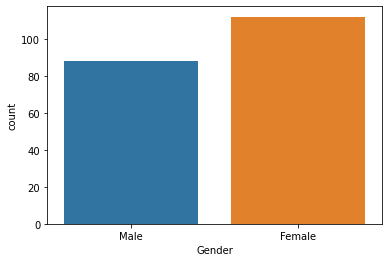

In [8]:
sns.countplot(x = 'Gender', data = df)
plt.show()

In [9]:
df = df .drop(["CustomerID"], axis = 1)

In [10]:
num_cols =  df.select_dtypes(exclude = 'object')
num_cols

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


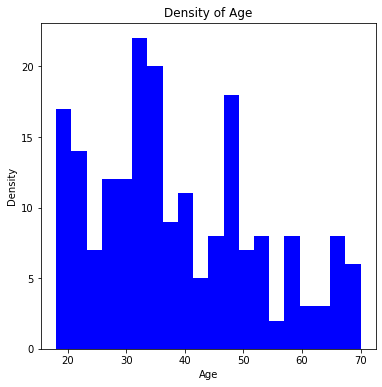

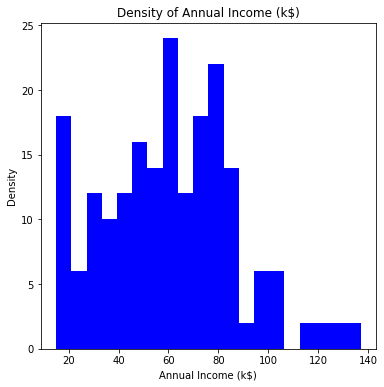

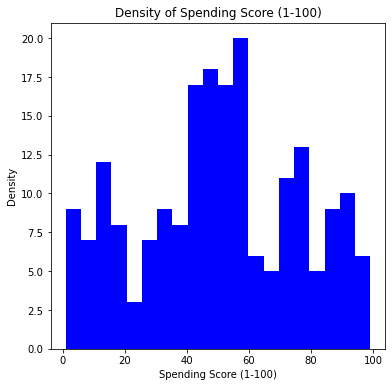

In [11]:
for col in num_cols:
    plt.figure(figsize=(6,6))
    plt.hist(x = num_cols[col], bins = 20, color = 'blue')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"Density of {col}")

<AxesSubplot:xlabel='Annual Income (k$)'>

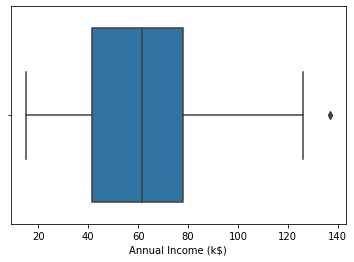

In [12]:
# Checking boxplot of the numerical column "Annual Income"
sns.boxplot(x = df['Annual Income (k$)'])

It contains a few outliers which have to be removed

In [13]:
Q1=df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

In [14]:
# Storing values only below the upper whisker
df = df[df['Annual Income (k$)']< Upper_Whisker]

<AxesSubplot:xlabel='Annual Income (k$)'>

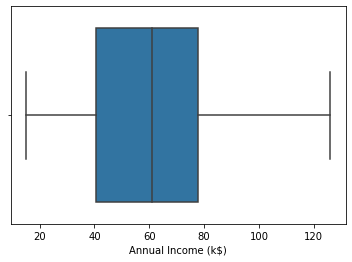

In [15]:
sns.boxplot(x = df['Annual Income (k$)'])

In [16]:
logging.info('Removed Outliers')

In [17]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


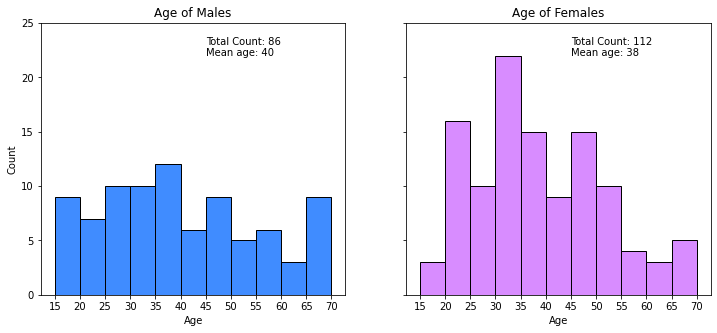

In [18]:
males_age = df[df['Gender']=='Male']['Age']
females_age = df[df['Gender']=='Female']['Age']

bins = range(15, 75, 5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5), sharey = True)
sns.histplot(males_age, bins= bins, kde = False, color = '#0066ff', ax = ax1)
ax1.set_xticks(bins)
ax1.set_ylim(top=25)
ax1.set_title("Age of Males")
ax1.set_ylabel("Count")
ax1.text(45, 23, "Total Count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {}".format(round(males_age.mean())))

sns.histplot(females_age, bins= bins, kde = False, color = '#cc66ff', ax = ax2)
ax2.set_xticks(bins)
ax2.set_title("Age of Females")
ax2.set_ylabel("Count")
ax2.text(45, 23, "Total Count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {}".format(round(females_age.mean())))
plt.show()

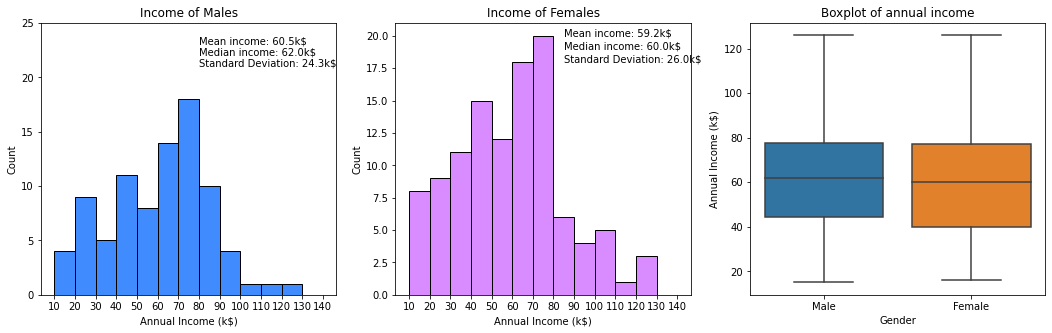

In [19]:
males_income = df[df['Gender']=='Male']['Annual Income (k$)']
females_income = df[df['Gender']=='Female']['Annual Income (k$)']

bins = range(10, 150, 10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,5))
sns.histplot(males_income, bins= bins, kde = False, color = '#0066ff', ax = ax1)
ax1.set_xticks(bins)
ax1.set_ylim(top=25)
ax1.set_title("Income of Males")
ax1.set_ylabel("Count")

ax1.text(80, 23, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(80, 22, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(80, 21, "Standard Deviation: {:.1f}k$".format(males_income.std()))

sns.histplot(females_income, bins= bins, kde = False, color = '#cc66ff', ax = ax2)
ax2.set_xticks(bins)
ax2.set_title("Income of Females")
ax2.set_ylabel("Count")

ax2.text(85, 20, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85, 19, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85, 18, "Standard Deviation: {:.1f}k$".format(females_income.std()))

sns.boxplot(x= 'Gender', y = 'Annual Income (k$)', data = df, ax = ax3)
ax3.set_title("Boxplot of annual income")
plt.show()

In [20]:
from scipy.stats import pearsonr

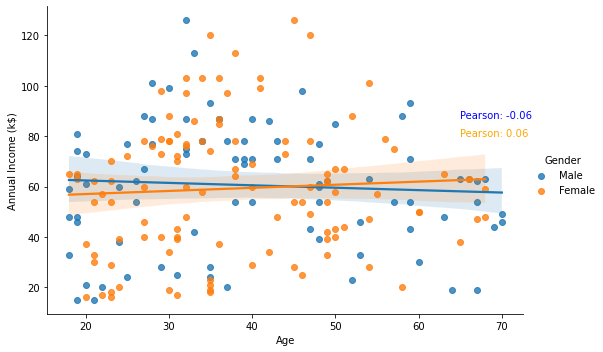

In [21]:
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x = 'Age', y = 'Annual Income (k$)', data = df, hue ='Gender', aspect = 1.5)
plt.text(65, 87, 'Pearson: {:.2f}'.format(corr1), color = 'blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color = 'orange')
plt.show()

There is negligible correlation between age and annual income

In [22]:
males_spending = df[df['Gender']=='Male']['Spending Score (1-100)']
females_spending = df[df['Gender']=='Female']['Spending Score (1-100)']


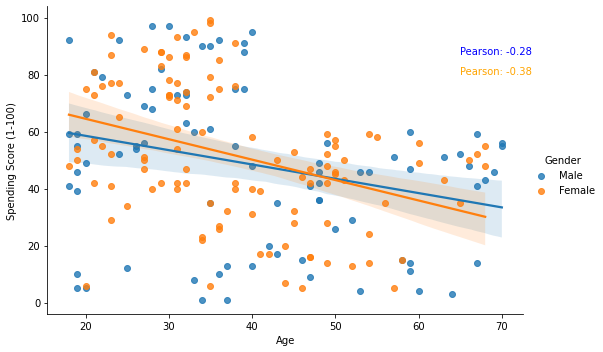

In [23]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x = 'Age', y = 'Spending Score (1-100)', data = df, hue ='Gender', aspect = 1.5)
plt.text(65, 87, 'Pearson: {:.2f}'.format(corr1), color = 'blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color = 'orange')
plt.show()

There is a weak negative correlation between age and spending score

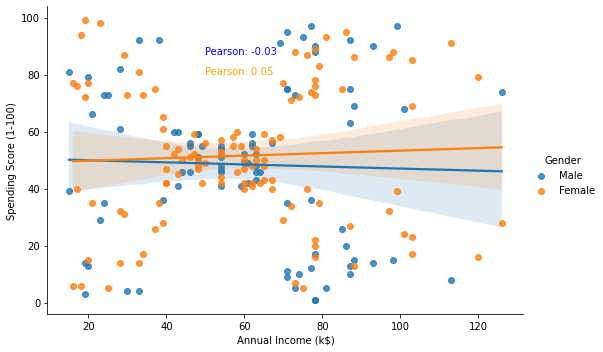

In [24]:
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue ='Gender', aspect = 1.5)
plt.text(50, 87, 'Pearson: {:.2f}'.format(corr1), color = 'blue')
plt.text(50, 80, 'Pearson: {:.2f}'.format(corr2), color = 'orange')
plt.show()

There is negligible correlation between annual income and spending score

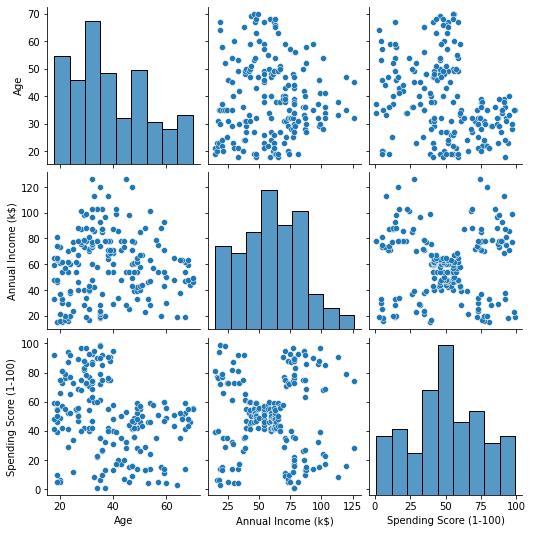

In [25]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
sns.pairplot(df[columns])

Choosing annual income and spending score as it shows to form groupings

## Clustering

### KMeans

In [26]:
df = df.iloc[:,[2,3]]

In [27]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [30]:
df_scaled

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051
...,...,...
193,2.113819,1.588795
194,2.391890,-1.331567
195,2.391890,1.121537
196,2.630236,-0.864309


In [31]:
X = df_scaled

In [32]:
X

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051
...,...,...
193,2.113819,1.588795
194,2.391890,-1.331567
195,2.391890,1.121537
196,2.630236,-0.864309


In [33]:
logging.info('Performed Standardization')

To find correct number of clusters we use WCSS(Within Cluster Sum of Sqaures) which finds distance between each data point and their centroid. For a good cluster, the points should be close to the centroid so that we can get good partioned clusters. Wehen we have the correct number of clusters the value of WCSS will be very low. So a elbow graph is plotted between WCSS nd number of clusters.

In [34]:
# Finding WCSS value for different number of clusters
from sklearn.metrics import silhouette_score
wcss = []
s_scores = []
n_clusters = [2,3,4,5,6,7,8,9,10]
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    sil_avg = silhouette_score(X, kmeans.labels_)
    s_scores.append(sil_avg)

# Elbow method

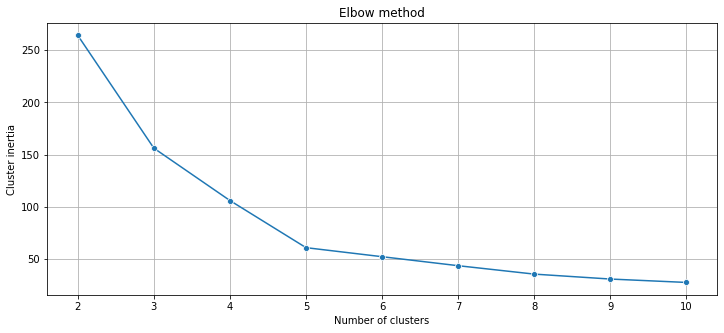

In [35]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x = n_clusters, y = wcss, marker ='o', ax =ax)
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Cluster inertia")
plt.grid()
plt.show()

In [36]:
logging.info('Peformed elbow method to find number of clusters')

# Silhouette score method

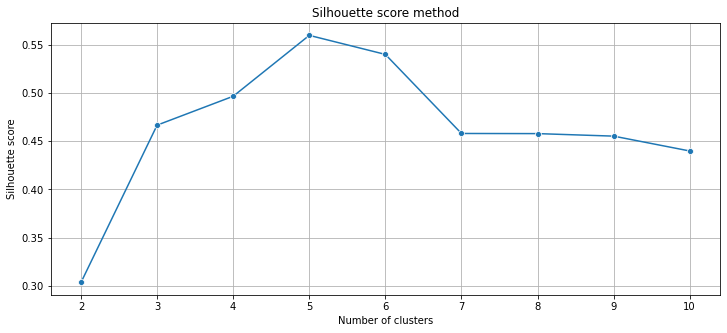

In [37]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores, marker ='o', ax =ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
plt.grid()
plt.show()

In [38]:
logging.info('Peformed Silhouette score method to find number of clusters')

## 5 clusters 

In [39]:
KM_5_clusters = KMeans(n_clusters=5, init = 'k-means++', random_state = 42).fit(X)
KM_5_clustered = X.copy()
KM_5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

In [40]:
logging.info('Applied clusters to K-means model')

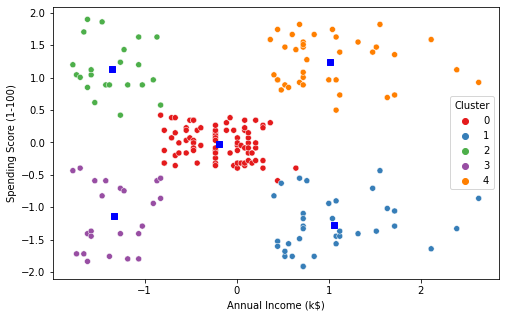

In [41]:
fig1, ax1 = plt.subplots(1, 1, figsize = (8,5))

sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = KM_5_clustered,
                        hue = 'Cluster', ax = ax1, palette= 'Set1', legend = 'full')


ax1.scatter(KM_5_clusters.cluster_centers_[:,0], KM_5_clusters.cluster_centers_[:,1], marker ='s', s =40, c ='blue')


plt.show()

In [42]:
KM_5_cluster_sizes = KM_5_clustered.groupby('Cluster').size().to_frame()
KM_5_cluster_sizes.columns = ['KM_5_size']
KM_5_cluster_sizes

,KM_5_size
Cluster,
0,80
1,35
2,22
3,23
4,38


- Cluster 0 consists of those people who are in the middle that earn moderately and also spend moderately. They consist of the most number of people. This group must be targeted to keep their shopping interest in place.
- Cluster 1 consists of people who earn very high but their spending is very less. Such people have the modey to spend and should be sent promotional offers to arouse an interest in spending
- Cluster 2 consists of a group of people whose earnings are very low but their spending score is the highest. This group should be focused on to provide discounts for their purchase.
- Cluster 3 contains those people whose income and spending score is relatively the lowest. 
- Cluster 4 is the best group as they earn well as well as have the highest spending scores. They should be informed of all promotional offers and must be updated.

In [43]:
import pickle
pickle.dump(scaler,open('scaling_kmeans.pkl','wb'))

In [44]:
pickle.dump(KM_5_clusters, open('model_kmeans.pkl', 'wb'))

In [45]:
logging.info('Saved the scaling model and clustering model')